In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [43]:
census = pd.read_csv('../data/demographic_census.csv')
voting_turnout = pd.read_csv('../data/2018-turnout-population-congress-districts.csv')
voting_age = pd.read_csv('../data/2018-age-population-congress-districts.csv')
voting_ed = pd.read_csv('../data/2018-education-population-congress-districts.csv')
voting_sex_poverty = pd.read_csv('../data/2018-sex-poverty-population-congress-districts.csv')
voting_race = pd.read_csv('../data/2018-race-population-congress-districts.csv')

In [3]:
census.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error"
0,01000US,United States,322903030,0,265385095,1661,197181177,8728,39715917,36196,...,57616,2769,15035465,85121,2730042,42504,1288890,25037,1441152,21598
1,50000US0101,"Congressional District 1, AL",706503,673,683855,695,459898,588,193875,811,...,0,28,5535,1033,1356,465,571,219,785,426
2,50000US0102,"Congressional District 2, AL",680575,1719,656410,1727,420590,1014,211747,1886,...,49,43,5964,850,1075,293,503,170,572,244
3,50000US0103,"Congressional District 3, AL",706705,1347,684817,1326,478120,1098,179170,1402,...,18,30,5356,806,1305,366,806,252,499,267
4,50000US0104,"Congressional District 4, AL",683391,2079,639036,2033,571190,1863,47200,891,...,525,514,14257,1467,1498,370,782,262,716,231


In [4]:
census.shape

(441, 44)

In [34]:
voting_turnout.head()

,Line #,State abbreviation,State name,Congressional district,"Votes cast for congressional representative for the November 6, 2018 election1",Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Voting Rate Estimate,Voting Rate Margin of error (MOE),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,AL,Alabama,1,"242,617","544,464","3,424",44.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"226,230","516,295","5,674",43.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"231,915","543,854","4,099",42.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"230,969","515,701","4,678",44.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"260,673","551,968","2,121",47.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
voting_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 19 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Line #                                                                          443 non-null    object 
 1   State abbreviation                                                              436 non-null    object 
 2   State name                                                                      436 non-null    object 
 3   Congressional district                                                          436 non-null    object 
 4   Votes cast for congressional representative for the November 6, 2018 election1  436 non-null    object 
 5    Citizen voting-age population Estimate                                         436 non-null    object 
 6    Citizen voting-ag

In [38]:
voting_age.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),18-29 Age Estimate,18-29 Age Margin of error (MOE),Age 18-29 Percent of total,18-29 Age Percent of total margin of error (MOE),...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,AL,Alabama,1,"544,464","3,424","104,060","2,412",19.1,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"516,295","5,674","109,222","2,918",21.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"543,854","4,099","121,328","2,379",22.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"515,701","4,678","95,990","2,777",18.6,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"551,968","2,121","109,986","1,624",19.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
voting_ed.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Less than 9th grade Estimate,Less than 9th grade Margin of error (MOE),Less than 9th grade Percent of total,Less than 9th grade Percent of total margin of error (MOE),...,Graduate degree Percent of total margin of error (MOE),High school or more Estimate,High school or more Margin of error (MOE),High school or more Percent of total,High school or more Percent of total margin of error (MOE),Bachelor's degree or more Estimate,Bachelor's degree or more Margin of error (MOE),Bachelor's degree or more Percent of total,Bachelor's degree or more Percent of total margin of error (MOE),Unnamed: 42
0,1,AL,Alabama,1,"544,464","3,424","13,409","1,845",2.5,0.3,...,0.7,"473,821","5,794",87.0,0.9,"123,479","5,614",22.7,1.1,NaN
1,2,AL,Alabama,2,"516,295","5,674","18,295","2,059",3.5,0.4,...,0.6,"444,808","6,761",86.2,0.9,"107,354","5,009",20.8,1.0,NaN
2,3,AL,Alabama,3,"543,854","4,099","19,578","2,504",3.6,0.5,...,0.7,"467,443","6,717",86.0,1.0,"104,816","6,147",19.3,1.1,NaN
3,4,AL,Alabama,4,"515,701","4,678","24,346","2,997",4.7,0.6,...,0.5,"433,505","6,247",84.1,1.0,"84,524","4,487",16.4,0.8,NaN
4,5,AL,Alabama,5,"551,968","2,121","14,908","2,282",2.7,0.4,...,0.8,"493,255","5,090",89.4,0.8,"173,277","6,244",31.4,1.1,NaN


In [44]:
voting_sex_poverty.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Men Estimate,Men Margin of error (MOE),Men Percent of total,Men Percent of total margin of error (MOE),...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1.0,AL,Alabama,1,"544,464","3,424","256,603","2,312",47.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,AL,Alabama,2,"516,295","5,674","243,971","3,467",47.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,AL,Alabama,3,"543,854","4,099","261,066","2,813",48.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,AL,Alabama,4,"515,701","4,678","248,166","3,029",48.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,AL,Alabama,5,"551,968","2,121","267,633","1,788",48.5,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
voting_race.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),White Estimate,White Margin of error (MOE),White Percent of total,White Percent of total margin of error (MOE),...,Two or more races Percent of total,Two or more races Percent of total margin of error (MOE),Hispanic Estimate,Hispanic Margin of error (MOE),Hispanic Percent of total,Hispanic Percent of total margin of error (MOE),White non-Hispanic Estimate,White non-Hispanic Margin of error (MOE),White non-Hispanic Percent of total,White non-Hispanic Percent of total margin of error (MOE)
0,1,AL,Alabama,1,"544,464","3,424","379,018","2,294",69.6,0.4,...,1.3,0.6,"11,678","1,192",2.1,0.2,"370,443","1,879",68.0,0.4
1,2,AL,Alabama,2,"516,295","5,674","338,162","2,699",65.5,0.7,...,1.5,0.6,"9,755","1,007",1.9,0.2,"331,192","2,414",64.1,0.7
2,3,AL,Alabama,3,"543,854","4,099","390,539","3,116",71.8,0.6,...,1.2,0.6,"12,241","1,773",2.3,0.3,"381,547","2,690",70.2,0.5
3,4,AL,Alabama,4,"515,701","4,678","459,105","4,697",89.0,0.5,...,1.6,0.7,"11,700","1,626",2.3,0.3,"451,856","4,178",87.6,0.5
4,5,AL,Alabama,5,"551,968","2,121","427,462","1,491",77.4,0.3,...,2.2,0.6,"14,670","1,569",2.7,0.3,"420,181",722,76.1,0.3


In [3]:
alabama112 = gpd.read_file('../data/congressional-district-boundaries/Alabama_108_to_112.geojson')

In [4]:
alabama112

,startcong,district,statename,member,endcong,id,geometry
0,108,1,Alabama,"{'112': {'20300': {'party': 'Republican', 'nam...",112,001108112001,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,108,2,Alabama,"{'112': {'21192': {'party': 'Republican', 'nam...",112,001108112002,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,108,3,Alabama,"{'112': {'20301': {'party': 'Republican', 'nam...",112,001108112003,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,108,4,Alabama,"{'112': {'29701': {'party': 'Republican', 'nam...",112,001108112004,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,108,5,Alabama,"{'112': {'21193': {'party': 'Republican', 'nam...",112,001108112005,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
5,108,6,Alabama,"{'112': {'29301': {'party': 'Republican', 'nam...",112,001108112006,"MULTIPOLYGON (((-86.96219 33.45121, -86.96431 ..."
6,108,7,Alabama,"{'112': {'21102': {'party': 'Democrat', 'name'...",112,001108112007,"MULTIPOLYGON (((-87.31454 33.21817, -87.31514 ..."


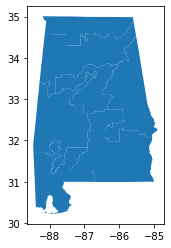

In [5]:
alabama112.plot();

In [6]:
alabama112.columns

Index(['startcong', 'district', 'statename', 'member', 'endcong', 'id',
       'geometry'],
      dtype='object')

In [28]:
districts_map = gpd.GeoDataFrame()

for i in range(1, 52):
    df = gpd.read_file("../data/congressional-districts/" + str(i) + ".geojson")
    districts_map = districts_map.append(df, ignore_index=True)

In [16]:
df

,startcong,district,statename,member,endcong,id,geometry
0,108,8,Wisconsin,"{'112': {'21190': {'party': 'Republican', 'nam...",112,055108112008,"MULTIPOLYGON (((-88.32011 44.27259, -88.32161 ..."
1,108,4,Wisconsin,"{'112': {'20537': {'party': 'Democrat', 'name'...",112,055108112004,"MULTIPOLYGON (((-87.97178 42.98781, -87.97189 ..."
2,108,5,Wisconsin,"{'112': {'14657': {'party': 'Republican', 'nam...",112,055108112005,"MULTIPOLYGON (((-87.98409 43.03861, -87.98729 ..."
3,108,6,Wisconsin,"{'112': {'14675': {'party': 'Republican', 'nam...",112,055108112006,"MULTIPOLYGON (((-89.66109 43.64265, -89.66868 ..."
4,108,7,Wisconsin,"{'112': {'21189': {'party': 'Republican', 'nam...",112,055108112007,"MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ..."
5,108,1,Wisconsin,"{'112': {'29939': {'party': 'Republican', 'nam...",112,055108112001,"MULTIPOLYGON (((-89.03391 42.70481, -89.03081 ..."
6,108,2,Wisconsin,"{'112': {'29940': {'party': 'Democrat', 'name'...",112,055108112002,"MULTIPOLYGON (((-89.83853 42.77553, -89.83854 ..."
7,108,3,Wisconsin,"{'112': {'29769': {'party': 'Democrat', 'name'...",112,055108112003,"MULTIPOLYGON (((-91.20906 43.42685, -91.22875 ..."


In [29]:
districts_map.tail(25)

,startcong,district,statename,member,endcong,id,geometry
411,108,8,Virginia,"{'112': {'29149': {'party': 'Democrat', 'name'...",112,051108112008,"MULTIPOLYGON (((-77.18489 38.85716, -77.18930 ..."
412,108,9,Virginia,"{'112': {'21191': {'party': 'Republican', 'nam...",112,051108112009,"MULTIPOLYGON (((-80.10484 36.84726, -80.10241 ..."
413,108,10,Virginia,"{'112': {'14869': {'party': 'Republican', 'nam...",112,051108112010,"MULTIPOLYGON (((-77.59931 38.79961, -77.59861 ..."
414,108,11,Virginia,"{'112': {'20952': {'party': 'Democrat', 'name'...",112,051108112011,"MULTIPOLYGON (((-77.05560 38.73351, -77.04730 ..."
415,108,7,Washington,"{'112': {'15613': {'party': 'Democrat', 'name'...",112,053108112007,"MULTIPOLYGON (((-122.22620 47.49094, -122.2273..."
416,108,8,Washington,"{'112': {'20536': {'party': 'Republican', 'nam...",112,053108112008,"MULTIPOLYGON (((-122.24936 47.15988, -122.2489..."
417,108,1,Washington,"{'112': {'29937': {'party': 'Democrat', 'name'...",112,053108112001,"MULTIPOLYGON (((-122.60830 47.62880, -122.6086..."
418,108,2,Washington,"{'112': {'20145': {'party': 'Democrat', 'name'...",112,053108112002,"MULTIPOLYGON (((-122.19952 47.89374, -122.1995..."
419,108,3,Washington,"{'112': {'21187': {'party': 'Republican', 'nam...",112,053108112003,"MULTIPOLYGON (((-123.72787 46.28973, -123.7285..."
420,108,4,Washington,"{'112': {'29580': {'party': 'Republican', 'nam...",112,053108112004,"MULTIPOLYGON (((-118.22893 46.59361, -118.2326..."


In [26]:
districts_map.loc[districts_map.statename == Wyoming]

NameError: name 'Wyoming' is not defined

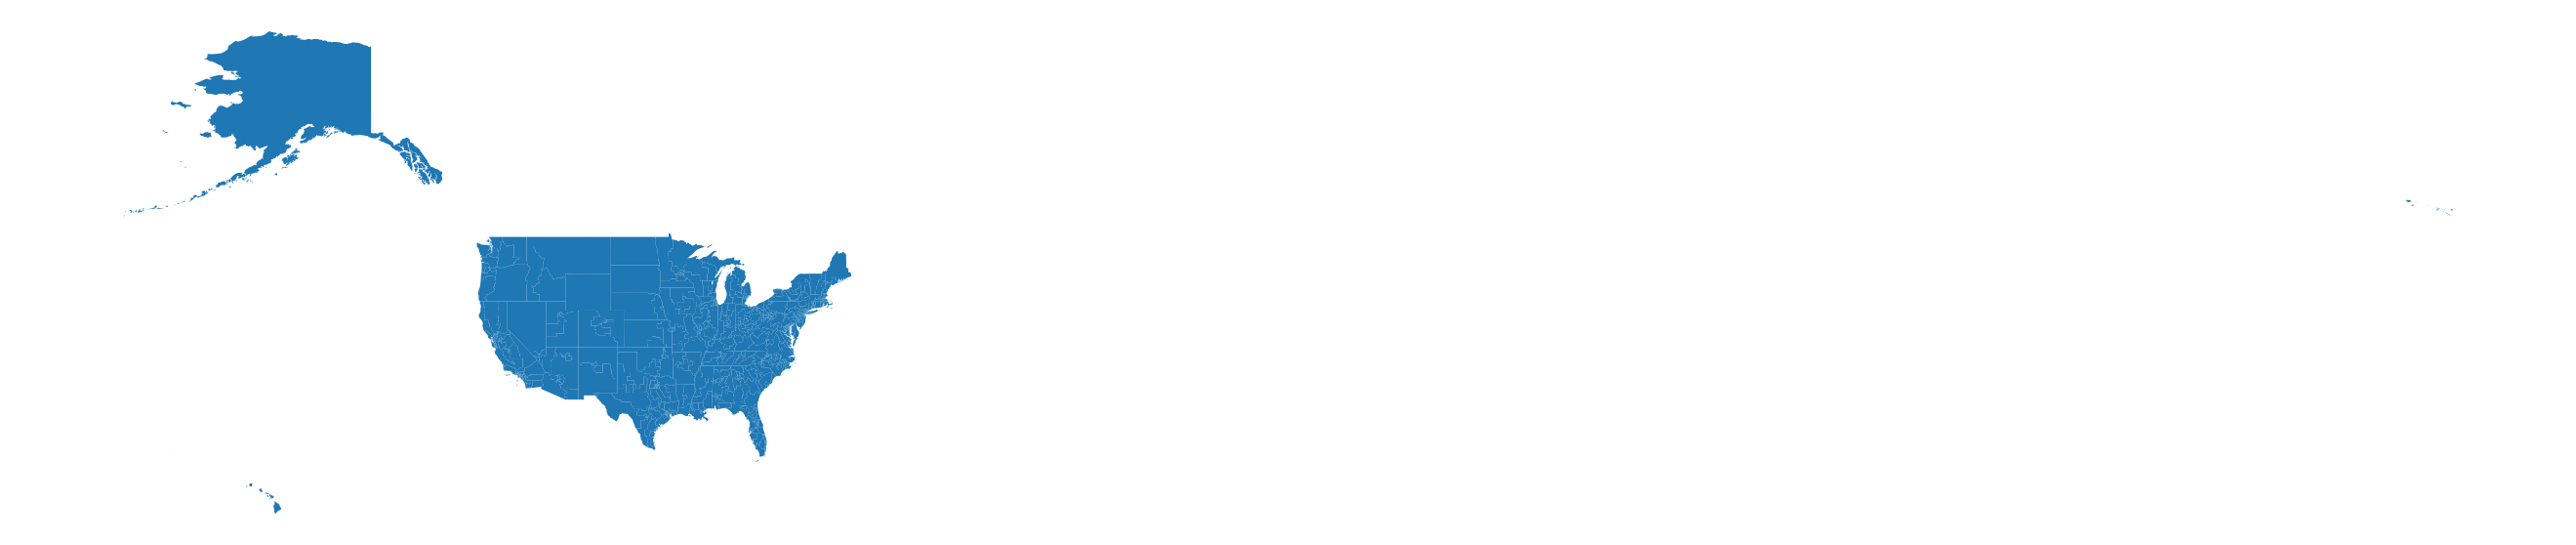

In [36]:
#districts_map.plot();
#figsize 20, 20
fig, ax = plt.subplots(figsize = (50, 10))
districts_map.plot(ax = ax)

ax.axis('off');


import os, json
#import pandas as pd

# this finds our json files
path_to_json = 'json/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

# here I define my pandas Dataframe with the columns I want to get from the json
#jsons_data = pd.DataFrame(columns=['country', 'city', 'long/lat'])

jsons_data = pd.DataFrame(columns=['startcong', 'district', 'statename', 'member', 'endcong', 'id', 'geometry'])

# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        country = json_text['features'][0]['properties']['country']
        city = json_text['features'][0]['properties']['name']
        lonlat = json_text['features'][0]['geometry']['coordinates']
        # here I push a list of data into a pandas DataFrame at row given by 'index'
        jsons_data.loc[index] = [country, city, lonlat]

# now that we have the pertinent json data in our DataFrame let's look at it
print(jsons_data)